# 서울시 공공 자전거의 빠른 회전율을 위한 대여이력 분석

- 사용할 데이터는 http://data.seoul.go.kr/dataList/OA-15182/F/1/datasetView.do 에서 다운받을 수 있음.
- 2020년 9월부터 2021년 01월 데이터를 다운받음.


In [1]:
# 필요하는 라이브러리 import

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import glob

# 경고 메시지 출력하지 않도록 다음과 같이 설정
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 주피터 노트북에서 그래프가 보이게 설정
%matplotlib notebook

In [3]:
# 한글 font 설정
import platform
import matplotlib.font_manager as fm

if platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [4]:
# 글씨 선명하게 출력하는 설정

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# 시작하기 전, 대용량 데이터(공공자전거 대여이력)를 read

1. glob 라이브러리와 glob 메소드를 이용하여 관련된 파일을 불러온다.
2. 반복문과 list를 이용하여 read 한다.

In [5]:
bic_data= glob.glob('./mid_data/공공자전거 대여이력 정보_*')
bic_data

['./mid_data\\공공자전거 대여이력 정보_2020.09.csv',
 './mid_data\\공공자전거 대여이력 정보_2020.10.csv',
 './mid_data\\공공자전거 대여이력 정보_2020.11.csv',
 './mid_data\\공공자전거 대여이력 정보_2020.12.csv',
 './mid_data\\공공자전거 대여이력 정보_2021.01.csv']

In [6]:
bic_all=[]

for file in bic_data:
    try:
        raw = pd.read_csv(file,index_col=False,encoding = 'cp949',parse_dates=[0])
        bic_all.append(raw)
    except:
        raw=pd.read_csv(file,index_col=False,encoding='UTF-8',parse_dates=[0])
        bic_all.append(raw)

In [7]:
bic = pd.concat(bic_all)
bic.reset_index(drop=True, inplace=True)
bic.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-32450,2020-09-01 00:01:11,1041,묘곡초등학교,0,2020-09-01 00:04:00,1083,광문고교사거리(아이파크),0,3,0.0
1,SPB-32422,2020-09-01 00:01:05,240,문래역 4번출구 앞,0,2020-09-01 00:04:33,262,영문초등학교 사거리,0,3,0.0
2,SPB-33319,2020-09-01 00:00:53,122,신성기사식당 앞,0,2020-09-01 00:06:03,143,공덕역 2번출구,0,5,0.0
3,SPB-31368,2020-09-01 00:01:06,1024,강동구청 앞,0,2020-09-01 00:06:08,1029,롯데 시네마,0,5,0.0
4,SPB-33604,2020-09-01 00:01:51,1157,강서구청,0,2020-09-01 00:06:32,1131,꿈돌이공원 앞,0,5,0.0


In [8]:
bic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8109777 entries, 0 to 8109776
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   int64  
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      int64  
 10  이용거리      float64
dtypes: float64(1), int64(5), object(5)
memory usage: 680.6+ MB


In [9]:
bic['대여일시']=pd.to_datetime(bic['대여일시'])
bic['반납일시']=pd.to_datetime(bic['반납일시'])
bic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8109777 entries, 0 to 8109776
Data columns (total 11 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      datetime64[ns]
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   대여거치대     int64         
 5   반납일시      datetime64[ns]
 6   반납대여소번호   int64         
 7   반납대여소명    object        
 8   반납거치대     int64         
 9   이용시간      int64         
 10  이용거리      float64       
dtypes: datetime64[ns](2), float64(1), int64(5), object(3)
memory usage: 680.6+ MB


In [10]:
bic=bic.drop('대여거치대',axis=1)
bic=bic.drop('반납거치대',axis=1)
bic=bic.drop('대여 대여소명',axis=1)
bic=bic.drop('반납대여소명',axis=1)

bic.head()

,자전거번호,대여일시,대여 대여소번호,반납일시,반납대여소번호,이용시간,이용거리
0,SPB-32450,2020-09-01 00:01:11,1041,2020-09-01 00:04:00,1083,3,0.0
1,SPB-32422,2020-09-01 00:01:05,240,2020-09-01 00:04:33,262,3,0.0
2,SPB-33319,2020-09-01 00:00:53,122,2020-09-01 00:06:03,143,5,0.0
3,SPB-31368,2020-09-01 00:01:06,1024,2020-09-01 00:06:08,1029,5,0.0
4,SPB-33604,2020-09-01 00:01:51,1157,2020-09-01 00:06:32,1131,5,0.0


In [11]:
bic.insert(1,'대여(YM)',bic['대여일시'].dt.strftime('%Y%m'))
bic.insert(2,'대여(month)',bic['대여일시'].dt.month)
bic.insert(3,'대여(hour)',bic['대여일시'].dt.strftime('%H'))
bic.insert(4,'고객',1)
bic.head()

,자전거번호,대여(YM),대여(month),대여(hour),고객,대여일시,대여 대여소번호,반납일시,반납대여소번호,이용시간,이용거리
0,SPB-32450,202009,9,00,1,2020-09-01 00:01:11,1041,2020-09-01 00:04:00,1083,3,0.0
1,SPB-32422,202009,9,00,1,2020-09-01 00:01:05,240,2020-09-01 00:04:33,262,3,0.0
2,SPB-33319,202009,9,00,1,2020-09-01 00:00:53,122,2020-09-01 00:06:03,143,5,0.0
3,SPB-31368,202009,9,00,1,2020-09-01 00:01:06,1024,2020-09-01 00:06:08,1029,5,0.0
4,SPB-33604,202009,9,00,1,2020-09-01 00:01:51,1157,2020-09-01 00:06:32,1131,5,0.0


# ----------------------------------------------------------------------------------

- 1. 월별 공공자전거 대여 횟수

In [19]:
# 월별 공공 자전거 대여 횟수 비교한 데이터 프레임 (month_bic)

month_bic=pd.DataFrame(bic.groupby('대여(YM)').count()['고객'])
month_bic

,고객
대여(YM),
202009,1273048
202010,2869182
202011,1975137
202012,1185907
202101,806503


<IPython.core.display.Javascript object>


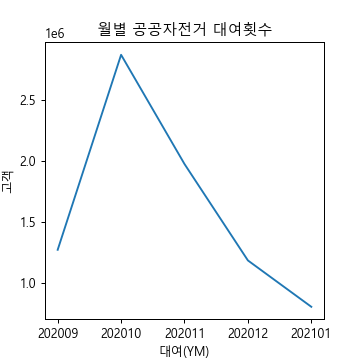

In [20]:
# 시각화 
month_bic.reset_index(level=['대여(YM)'],inplace=True)

plt.figure(figsize=(4,4))
plt.title("월별 공공자전거 대여횟수")
sns.lineplot(data=month_bic, x="대여(YM)", y="고객")

# ----------------------------------------------------------------------------------

- 2. 월별 자전거를 이용해 이동한 평균거리

In [23]:
# 월별 자전거 이용해 이동한 평균거리 데이터 프레임 (month_dis)

month_dis=pd.DataFrame(bic.groupby('대여(YM)').mean()['이용거리'])
month_dis=month_dis.rename(columns={'이용거리':'평균 이용거리'})
month_dis

,평균 이용거리
대여(YM),
202009,1244.242216
202010,317.182635
202011,168.376186
202012,529.407123
202101,2783.126334


<IPython.core.display.Javascript object>


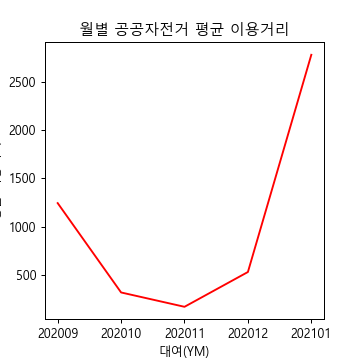

In [24]:
# 시각화 
month_dis.reset_index(level=['대여(YM)'],inplace=True)

plt.figure(figsize=(4,4))
plt.title("월별 공공자전거 평균 이용거리")
sns.lineplot(data=month_dis, x="대여(YM)", y="평균 이용거리",color='red')

# ----------------------------------------------------------------------------------

- 3. 시간대별 공공자전거 사용자수 내림차순으로 비교

In [25]:
#  시간대별 사용자수 내림차순으로 비교 (time_user)

time_user=bic.groupby('대여(hour)').count()[['대여(month)']].sort_values(by='대여(month)',ascending=False)
time_user.head()

,대여(month)
대여(hour),
18,757435
17,668880
16,551820
19,537509
15,496109


<IPython.core.display.Javascript object>


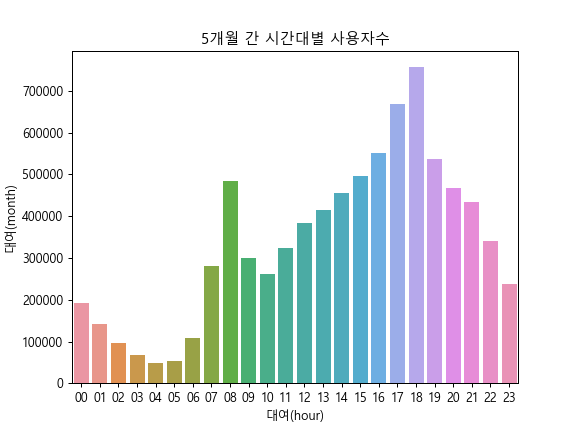

In [26]:
# 시각화 
time_user.reset_index(level=['대여(hour)'],inplace=True)

plt.title("5개월 간 시간대별 사용자수")
sns.barplot(data=time_user,y='대여(month)',x='대여(hour)')

# ----------------------------------------------------------------------------------

- 4. '대여', '반납'이 잦은 10개의 대여소 번호 찾기

In [27]:
# 대여가 잦은 대여소 10개 추출 (go_bic)

go_bic=bic.groupby('대여 대여소번호').sum()[['고객']].sort_values(by='고객',
                                                         ascending=False).head(10)
go_bic=go_bic.rename(columns={'고객':'대여고객'})
go_bic

,대여고객
대여 대여소번호,
502,33027
207,30459
2102,27634
1153,24884
152,23180
1210,21320
2177,20716
2715,20344
583,19408


In [28]:
# 반납이 잦은 대여소 10개 추출 (back_bic)
back_bic=bic.groupby('반납대여소번호').sum()[['고객']].sort_values(by='고객',
                                                          ascending=False).head(10)
back_bic=back_bic.rename(columns={'고객':'반납고객'})
back_bic

,반납고객
반납대여소번호,
502,37206
207,31464
2102,28206
152,25910
1153,25074
2177,21638
1210,21418
583,20257
2715,20198


In [29]:
# 대여와 반납을 합쳐서 비교하는 데이터 프레임 (all_bic)

go_bic.reset_index(level=['대여 대여소번호'],inplace=True)
go_bic=go_bic.rename(columns={'대여 대여소번호':'대여소'})

back_bic.reset_index(level=['반납대여소번호'],inplace=True)
back_bic=back_bic.rename(columns={'반납대여소번호':'반납소'})

all_bic=pd.concat([go_bic, back_bic], axis=1, join='inner')
all_bic

,대여소,대여고객,반납소,반납고객
0,502,33027,502,37206
1,207,30459,207,31464
2,2102,27634,2102,28206
3,1153,24884,152,25910
4,152,23180,1153,25074
5,1210,21320,2177,21638
6,2177,20716,1210,21418
7,2715,20344,583,20257
8,583,19408,2715,20198
9,1160,18830,565,19417


# ----------------------------------------------------------------------------------

- 5. 사용자가 많은(대여기준) 10개의 대여소 추출, 그 대여소의 고객들의 자전거 이용 평균시간 

In [36]:
# 대여소별 자전거 이용 평균시간 비교한 데이터 프레임 (top10_avg)

top10=bic.groupby('대여 대여소번호').sum()[['고객','이용시간']].sort_values(by='고객',
                                                               ascending=False).head(10)
top10

,고객,이용시간
대여 대여소번호,,
502,33027,1453605
207,30459,1501531
2102,27634,941520
1153,24884,466203
152,23180,1096324
1210,21320,601533
2177,20716,621333
2715,20344,344042
583,19408,867829


In [37]:
top10['고객']= top10['이용시간']/top10['고객']
top10

,고객,이용시간
대여 대여소번호,,
502,44.012626,1453605
207,49.296792,1501531
2102,34.071072,941520
1153,18.735051,466203
152,47.296117,1096324
1210,28.214493,601533
2177,29.992904,621333
2715,16.911227,344042
583,44.715014,867829


In [38]:
top10_avg=top10.drop('이용시간',axis=1)
top10_avg=top10_avg.rename(columns={'고객':'이용 평균시간'})
top10_avg

,이용 평균시간
대여 대여소번호,
502,44.012626
207,49.296792
2102,34.071072
1153,18.735051
152,47.296117
1210,28.214493
2177,29.992904
2715,16.911227
583,44.715014


<IPython.core.display.Javascript object>


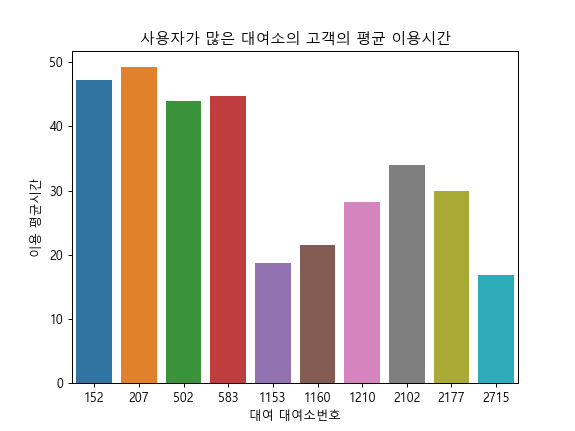

In [39]:
# 시각화
top10_avg.reset_index(level=['대여 대여소번호'],inplace=True)

plt.title("사용자가 많은 대여소의 고객의 평균 이용시간")
sns.barplot(data=top10_avg, x="대여 대여소번호", y="이용 평균시간")
